In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [31]:
def ARSeries(coeffs, std, x0, nPoints):
    n=len(coeffs)
    x=[x0]*(n-1)
    np.random.seed()
    gaussNoise=np.random.normal(0., std, nPoints)
    
    for i in range(nPoints):
        xNew = coeffs[0]
        for j in range(1,n):
            xNew+=coeffs[j]*x[-j]
        xNew += gaussNoise[i]
        x.append(xNew)
    return x

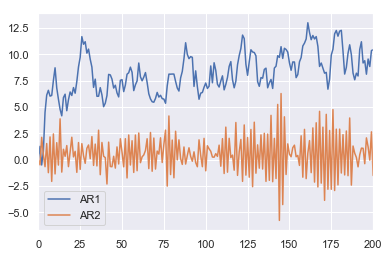

In [32]:
arSeries1=ARSeries([1,0.9], 1., 0., 200)
#plt.plot(arSeries1);
arSeries2=ARSeries([1,-0.9], 1., 0., 200)
df=pd.DataFrame({'AR1' : arSeries1, 'AR2': arSeries2})
df.plot()

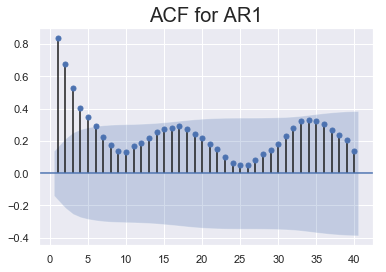

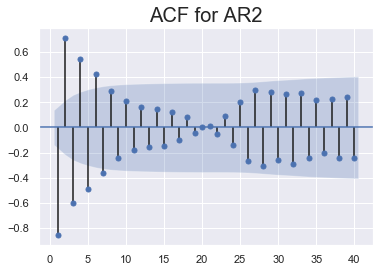

In [36]:
sgt.plot_acf(df.AR1, zero=False, lags=40)
plt.title('ACF for AR1', size=20);
sgt.plot_acf(df.AR2, zero=False, lags=40)
plt.title('ACF for AR2', size=20);

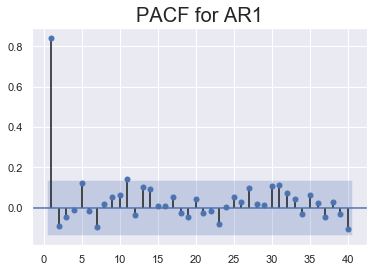

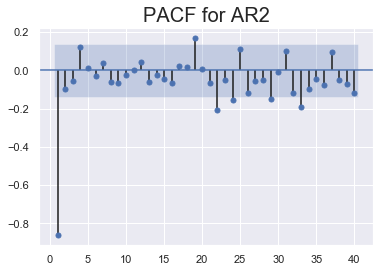

In [38]:
sgt.plot_pacf(df.AR1, zero=False, lags=40)
plt.title('PACF for AR1', size=20);
sgt.plot_pacf(df.AR2, zero=False, lags=40)
plt.title('PACF for AR2', size=20);